# CMAP LINCS 2020 Data

## Description of the Data

!!Deprecated, Data is not present in Directory, Notebook only for understanding datastructure!!

### What is CMap
The Connectivity Map (CMap) is a tool that helps find links between diseases, genes, and treatments by studying how cells respond to different changes. Its database holds over a million gene expression patterns from experiments that increase or decrease gene activity. 

By comparing the changes in gene expression caused by a disease or treatment (called a differential expression signature) with those in the database, researchers can identify similarities. When two changes are very similar, they are considered "connected," suggesting they may have similar effects on cells. Scientists use these connections to explore new ideas for treating diseases like cancer, neurological disorders, and infections.

### What is a Landmark Gene
A landmark gene is a gene identified as particularly informative for understanding the overall activity of the transcriptome (the full set of gene expressions in a cell).

These genes are directly measured in the L1000 assay, which focuses on a specific set of landmark genes. The "L" in L1000 refers to this targeted approach.

Landmark genes were chosen because:

They are widely expressed across different cell types.
They can reliably predict the activity of other genes that are not directly measured.
By measuring only these selected genes and using computational models to infer the rest, the process becomes more cost-effective and efficient. This approach has allowed a massive expansion of the Connectivity Map (CMap).

The full list of landmark genes can be accessed through the CLUE Command App with the command /gene-space lm.

### What are the Data Levels

- Level 1 (LXB): Raw fluorescent intensity (FI) values measured for each bead by Luminex scanners, representing the abundance of transcripts for each gene. Each well generates a file with FI values for all beads.

- Level 2 (GEX): Gene expression levels for the 978 landmark genes, calculated by deconvoluting the FI values from Level 1.

- Level 3a (NORM): Normalized gene expression data for the 978 landmark genes, adjusted using invariant gene sets and quantile normalization across plates.

- Level 3b (INF): Inferred expression values for 11,350 additional genes, estimated from the normalized values of the 978 landmark genes in Level 3a.

- Level 4 (ZS): Z-scores calculated for all 12,328 genes (landmark and inferred), highlighting differentially expressed genes by comparing each profile to its population control.

- Level 5 (MODZ): Collapsed z-score vectors from Level 4, combining data from replicates to generate a single differential expression "signature" per perturbation. Connectivity analyses are performed at this level.

For Levels 1-2, data is available only for the 978 landmark genes. For Levels 3-5, data covers all 12,328 genes. Level 5 is the most useful for biological discovery and connectivity analysis. Lower levels are helpful for examining raw data and intermediate steps.

## How does the Data look

In the following we will take a look at the data and metadata files.

### Data 
```level3_beta_trt_oe_n131668x12328.gctx```

Contains level3 data. E.g. the gene expression values for all genes for all experiments

- Shape:    (row: 12328, col: 131668)
- Rows:     Genes for which the expression values where measured
- Columns:  All conducted experiments (TODO elaborate further)
- Note:     rid is a string value!

### Metadata
- ```geneinfo_beta.txt```       Metadata for genes (the features of the data matrices)
- ```instinfo_beta.txt```       Metadata for each experiment in the Levels 3-4 matrices
- ```cellinfo_beta.txt```       Metadata for cell lines
- ```compoundinfo_beta.txt```   Metadata for cell lines, one entry per compound/moa/target/structure combination, so some compounds appear more than once

In [1]:
# Read Data
import cmapPy.pandasGEXpress.parse as parse

data = parse.parse('level3_beta_trt_oe_n131668x12328.gctx')
df_level3_data = data.data_df

/home/johanna/Documents/Uni/Master/WiSe_2425/Masterarbeit/data/.venv/lib/python3.11/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
/home/johanna/Documents/Uni/Master/WiSe_2425/Masterarbeit/data/.venv/lib/python3.11/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))


In [2]:
df_level3_data.head()

cid,ERBB2003_A549_96H_X1_B21:A05,ERBB2003_A549_96H_X1_B21:A06,ERBB2003_A549_96H_X1_B21:A07,ERBB2003_A549_96H_X1_B21:A08,ERBB2003_A549_96H_X1_B21:A09,ERBB2003_A549_96H_X1_B21:A10,ERBB2003_A549_96H_X1_B21:A11,ERBB2003_A549_96H_X1_B21:A12,ERBB2003_A549_96H_X1_B21:A13,ERBB2003_A549_96H_X1_B21:A15,...,TA.OE015_A549_96H_X8_B19:P11,TA.OE015_A549_96H_X8_B19:P12,TA.OE015_A549_96H_X8_B19:P13,TA.OE015_A549_96H_X8_B19:P14,TA.OE015_A549_96H_X8_B19:P17,TA.OE015_A549_96H_X8_B19:P19,TA.OE015_A549_96H_X8_B19:P20,TA.OE015_A549_96H_X8_B19:P22,TA.OE015_A549_96H_X8_B19:P23,TA.OE015_A549_96H_X8_B19:P24
rid,,,,,,,,,,,,,,,,,,,,,
10,6.7794,6.55075,5.7186,6.1913,5.9917,7.3337,6.51920,5.7406,6.7655,4.5394,...,5.263650,5.268900,5.123625,5.124600,5.167000,5.43870,5.45105,5.669950,5.404750,5.37420
100,8.5170,10.98780,9.1529,8.2880,8.2564,9.4163,10.01420,7.8803,9.9879,9.0717,...,9.244050,9.413800,9.883450,8.895050,9.683250,9.28125,9.18145,10.080700,9.439150,10.09645
1000,5.4585,3.38300,5.2214,4.7933,6.9956,6.5304,4.73040,5.0800,6.3162,7.2020,...,8.213449,8.841925,8.571000,7.332400,7.586051,6.36970,7.55340,7.821150,6.354600,5.63930
10000,9.4968,8.69510,9.0822,7.4592,8.0338,8.0230,9.35240,8.2612,8.9380,8.8296,...,9.061300,8.588700,7.691275,8.148849,8.252550,8.72030,8.20060,7.215100,7.619649,8.21825
10001,7.7145,8.16360,8.5553,8.4782,8.5120,8.7502,7.86335,7.9783,7.9371,7.6112,...,9.552100,9.521650,9.784600,9.502850,10.075700,9.10640,9.59915,10.287575,9.441350,9.44690


In [3]:
# Read Metadata
import pandas as pd

df_cell_info = pd.read_csv('cellinfo_beta.txt', sep='\t')       # Metadata for cell lines
df_gene_info = pd.read_csv('geneinfo_beta.txt', sep='\t')       # Metadata for genes (the features of the data matrices)
df_inst_info = pd.read_csv('instinfo_beta.txt', sep='\t')       # Metadata for levels 3 and 4 profiles
df_comp_info = pd.read_csv('compoundinfo_beta.txt', sep='\t')   # Metadata for cell lines 

/tmp/ipykernel_7277/4006724172.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inst_info = pd.read_csv('instinfo_beta.txt', sep='\t')       # Metadata for levels 3 and 4 profiles


In [4]:
print('df_cell_info shape:', df_cell_info.shape)
print('df_gene_info shape:', df_gene_info.shape)
print('df_inst_info shape:', df_inst_info.shape)
print('df_comp_info shape:', df_comp_info.shape)
print('df_level3_data shape:', df_level3_data.shape)

df_cell_info shape: (240, 20)
df_gene_info shape: (12328, 7)
df_inst_info shape: (3026460, 30)
df_comp_info shape: (39321, 7)
df_level3_data shape: (12328, 131668)


In [5]:
df_gene_info.head()

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
0,750,GAS8-AS1,ENSG00000221819,GAS8 antisense RNA 1,ncRNA,NCBI,inferred
1,6315,ATXN8OS,NaN,ATXN8 opposite strand lncRNA,ncRNA,NCBI,inferred
2,7503,XIST,ENSG00000229807,X inactive specific transcript,ncRNA,NCBI,inferred
3,8552,INE1,ENSG00000224975,inactivation escape 1,ncRNA,NCBI,inferred
4,9834,FAM30A,ENSG00000226777,family with sequence similarity 30 member A,ncRNA,NCBI,inferred


In [6]:
# get ids of landmark genes
landmark_gene_ids = df_gene_info[df_gene_info['feature_space'] == 'landmark']['gene_id'].values

In [7]:
# create dataframe with only landmark genes. 
# For that select rows with gene ids in landmark_gene_ids.
# Note that the gene ids as string are the row ids (rid) in the data matrix.
df_level3_data_landmark = df_level3_data.loc[[str(i) for i in landmark_gene_ids]]
df_gene_info_landmark = df_gene_info[df_gene_info['gene_id'].isin(landmark_gene_ids)]
print('df_level3_data_landmark shape:', df_level3_data_landmark.shape)
print('df_gene_info_landmark shape:', df_gene_info_landmark.shape)
df_level3_data_landmark.head()

df_level3_data_landmark shape: (978, 131668)
df_gene_info_landmark shape: (978, 7)


cid,ERBB2003_A549_96H_X1_B21:A05,ERBB2003_A549_96H_X1_B21:A06,ERBB2003_A549_96H_X1_B21:A07,ERBB2003_A549_96H_X1_B21:A08,ERBB2003_A549_96H_X1_B21:A09,ERBB2003_A549_96H_X1_B21:A10,ERBB2003_A549_96H_X1_B21:A11,ERBB2003_A549_96H_X1_B21:A12,ERBB2003_A549_96H_X1_B21:A13,ERBB2003_A549_96H_X1_B21:A15,...,TA.OE015_A549_96H_X8_B19:P11,TA.OE015_A549_96H_X8_B19:P12,TA.OE015_A549_96H_X8_B19:P13,TA.OE015_A549_96H_X8_B19:P14,TA.OE015_A549_96H_X8_B19:P17,TA.OE015_A549_96H_X8_B19:P19,TA.OE015_A549_96H_X8_B19:P20,TA.OE015_A549_96H_X8_B19:P22,TA.OE015_A549_96H_X8_B19:P23,TA.OE015_A549_96H_X8_B19:P24
rid,,,,,,,,,,,,,,,,,,,,,
16,9.97770,9.2322,10.2076,9.85420,10.0740,10.3352,10.3919,10.18040,9.31940,10.766001,...,11.067101,11.559151,10.869450,10.693649,11.052050,10.91925,10.913400,11.47345,10.94405,11.000800
23,10.50515,9.4864,9.5072,10.25015,9.6463,9.6503,9.6965,9.78650,10.49010,9.472600,...,10.100900,9.987801,9.523575,9.679925,9.339450,10.39190,9.618425,9.81185,9.73830,10.048900
25,8.22670,8.3297,8.4458,7.81290,8.3367,9.5343,7.9089,8.20150,8.46765,8.222300,...,9.343700,8.924300,8.726400,8.987500,8.490650,9.08375,8.620575,9.00835,8.68405,9.391975
30,7.93825,6.9900,7.5065,7.40730,8.4556,8.2668,7.2627,7.11335,7.52885,6.784500,...,6.903800,7.964900,7.048400,7.180750,7.317175,8.00350,7.266650,7.14095,7.23950,6.936900
39,10.75500,11.1286,10.5763,9.79890,9.0908,9.1938,11.5832,9.24150,8.85120,3.890400,...,8.157850,8.281825,8.518100,8.930550,8.610300,8.38365,8.661249,8.63690,8.71530,8.712749


In [8]:
# get all column names e.g the sample ids of level 3 data
sample_ids = df_level3_data.columns.values

In [9]:
# create a new dataframe from inst_info with only the sample ids of the level 3 data
df_inst_info_subset = df_inst_info[df_inst_info['sample_id'].isin(sample_ids)]
print('df_inst_info_subset shape:', df_inst_info_subset.shape)

df_inst_info_subset shape: (131668, 30)


In [10]:
# Look at some sample data. create a new dataframe with one row that is the row with rid 16. And all columns that contain ERBB2003_A549_96H_X1_B21
df_level3_data_sample = df_level3_data.loc[['16'], [col for col in df_level3_data.columns if 'ERBB2003_A549_96H_X1_B21' in col]]
df_level3_data_sample

cid,ERBB2003_A549_96H_X1_B21:A05,ERBB2003_A549_96H_X1_B21:A06,ERBB2003_A549_96H_X1_B21:A07,ERBB2003_A549_96H_X1_B21:A08,ERBB2003_A549_96H_X1_B21:A09,ERBB2003_A549_96H_X1_B21:A10,ERBB2003_A549_96H_X1_B21:A11,ERBB2003_A549_96H_X1_B21:A12,ERBB2003_A549_96H_X1_B21:A13,ERBB2003_A549_96H_X1_B21:A15,...,ERBB2003_A549_96H_X1_B21:P11,ERBB2003_A549_96H_X1_B21:P12,ERBB2003_A549_96H_X1_B21:P15,ERBB2003_A549_96H_X1_B21:P16,ERBB2003_A549_96H_X1_B21:P19,ERBB2003_A549_96H_X1_B21:P20,ERBB2003_A549_96H_X1_B21:P21,ERBB2003_A549_96H_X1_B21:P22,ERBB2003_A549_96H_X1_B21:P23,ERBB2003_A549_96H_X1_B21:P24
rid,,,,,,,,,,,,,,,,,,,,,
16,9.9777,9.2322,10.2076,9.8542,10.074,10.3352,10.3919,10.1804,9.3194,10.766001,...,10.61405,10.3459,9.3974,9.3511,11.18675,10.1745,10.30905,10.39585,9.7964,9.59


In [11]:
# get metadata for the gene with gene_id 16
df_gene_info[df_gene_info['gene_id'] == 16]


,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
2154,16,AARS,ENSG00000090861,alanyl-tRNA synthetase,protein-coding,NCBI,landmark


In [12]:
# get metadata for the sample with sample_id ERBB2003_A549_96H_X1_B21:A05
df_inst_info[df_inst_info['sample_id'] == 'ERBB2003_A549_96H_X1_B21:A05']
df_inst_info[1000:1005]['pert_mfc_id']

1000    BRD-K94763113
1001    BRD-K18910433
1002    BRD-K24297741
1003         LUC_M617
1004       7048_L308P
Name: pert_mfc_id, dtype: object

In [13]:
df_ERB_inst_info = df_inst_info[df_inst_info['sample_id'] == 'ERBB2003_A549_96H_X1_B21:A06']
# show only first 10 columns
# select every column that contains pert
df_ERB_inst_info[[col for col in df_ERB_inst_info.columns if 'pert' in col]].head()


,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,pert_mfc_id,pert_id,pert_type
2152953,0.01,uM,0.01 uM,96.0,96 h,h,BRDN0000998014,BRDN0000998014,trt_oe


In [14]:
# get metata for the cell line A549
df_cell_info[df_cell_info['cell_iname'] == 'A549']

,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
113,A549,CVCL_0023,58,NaN,NaN,48,F-12K ATCC catalog # 3-24,CCL-185,c-4,tumor,Caucasian,M,Primary,lung,lung cancer,non small cell carcinoma,ATCC,adherent,A549_LUNG,A 549


## Datenpunkt ERBB2003_A549_96H_X1_B21:A05 - 16 Zusammengefasst

- Der Datenpunkt beschreibt die GenExpression des Genes mit der id 16. Dabei handelt es sich um alanyl-tRNA synthetase
- Das Experiment wurde an einer Zelle der Zelllinie *A549* durchgeführt (Einer Lungenkrebs-Tumor Zelle)
- Es handelt sich um ein pertubagen des types trt_oe, also "cDNA for overexpression of wild-type of gene". Das bedeutet, es wird eine zusätzliche Kopie    der natürlichen cDNA eines bestimmten Gens in die Zelle eingebracht, um die Menge des von diesem Gen produzierten Proteins zu erhöhen.
- Die ID von dem pertubagen ist BRDN0000998014. **Frage** Wie finde ich mehr darüber heraus? Müsste hier nicht eine ground truth bekannt sein? Also welches gen overexpressed wird? in der compound tabelle finde ich nichts :()
- Es wurden 0.01 uM für 96h von dem pertubagen auf die zelle angewand
- **FRAGE** Wie kann ich daraus jetzt Zeitverläufe rekonstruieren?

## Experiment 1: Korrelation der Genexpression
Ziel: ggf. Graphen erstellen anhand von Korrelationen in der Genexpression verschiedener Gene.
ToDo: 
- Landmark gene auf korrelation testen 
- 50 Gene mit den extremsten korrelationswerten auswählen
- Gene als knoten darstellen
- Korrelationen als gewichtete Kanten

In [15]:
# ToDo: 
# - Landmark gene auf korrelation testen 
# - 50 Gene mit den extremsten korrelationswerten auswählen
# - Gene als knoten darstellen
# - Korrelationen als gewichtete Kanten
# - Graph mit networkx erstellen
# - Graph visualisieren

# get correlation matrix for landmark genes. the genes are the rows and the columns are the samples
# select subset of columns to make it faster
df_level3_data_landmark_subset = df_level3_data_landmark[[col for col in df_level3_data_landmark.columns if 'ERBB2003_A549_96H_X1_B21' in col]]
corr_matrix = df_level3_data_landmark_subset.T.corr()
corr_matrix.head()

rid,16,23,25,30,39,47,102,128,142,154,...,94239,116832,124583,147179,148022,200081,200734,256364,375346,388650
rid,,,,,,,,,,,,,,,,,,,,,
16,1.000000,-0.214132,-0.082310,-0.233554,0.221084,0.002755,-0.045553,0.062466,0.233429,0.027442,...,0.221884,0.269026,-0.001848,-0.183140,-0.118167,-0.206709,-0.065839,-0.206049,-0.035142,0.047209
23,-0.214132,1.000000,-0.387623,-0.374298,0.321371,-0.416891,-0.300165,-0.609228,-0.548475,-0.009577,...,0.431088,-0.564098,0.117264,-0.368566,-0.017505,-0.501940,0.614922,-0.330231,0.093737,0.450925
25,-0.082310,-0.387623,1.000000,0.390463,-0.350741,0.392056,0.236897,0.371182,0.338332,-0.029906,...,-0.500327,0.327317,-0.015210,0.473726,0.063079,0.528329,-0.468465,0.450335,-0.004969,-0.479181
30,-0.233554,-0.374298,0.390463,1.000000,-0.309652,0.386990,0.351893,0.380332,0.168357,0.032239,...,-0.505611,0.273222,-0.094726,0.509019,0.038669,0.491821,-0.422248,0.575704,0.077627,-0.429138
39,0.221084,0.321371,-0.350741,-0.309652,1.000000,-0.454028,-0.265805,-0.475247,-0.344088,0.060282,...,0.608977,-0.234271,0.104888,-0.537175,-0.194209,-0.646800,0.544489,-0.306238,0.221551,0.476537


In [16]:
# get 50 genes that have the most extreme correlation to gene with gene_id 16
gene_id = "16"
corr_gene = corr_matrix[str(gene_id)]
corr_gene = corr_gene.drop(gene_id)
corr_gene = corr_gene.abs()
corr_gene = corr_gene.sort_values(ascending=False)
top50_genes = corr_gene.head(50)

# get gene ids of top 50 genes
top50_gene_ids = top50_genes.index.values

# create a new matrix with only the top 50 genes and the gene with gene_id 16. the values are the correlation values
corr_matrix_top50 = corr_matrix.loc[[str(gene_id)] + [str(i) for i in top50_gene_ids], top50_gene_ids]
corr_matrix_top50.head()


rid,4172,8914,6810,4690,5525,79143,672,23512,25976,4651,...,1981,6657,57192,4605,1616,51053,3815,10732,5641,22796
rid,,,,,,,,,,,,,,,,,,,,,
16,0.588246,0.529124,-0.472223,-0.468980,0.454197,-0.451673,0.433502,0.428524,-0.411758,0.410931,...,0.328672,-0.328315,0.324913,0.324259,-0.323180,-0.321710,0.320528,0.320418,-0.319842,0.317158
4172,1.000000,0.651221,-0.417577,-0.468515,0.419743,-0.413616,0.456216,0.470956,-0.610521,0.275013,...,0.392911,-0.106285,0.300626,0.489816,-0.265130,-0.125649,0.387486,0.241791,-0.240042,0.383086
8914,0.651221,1.000000,-0.287245,-0.525001,0.521163,-0.374308,0.450453,0.428022,-0.715886,0.243125,...,0.515967,-0.092257,0.373137,0.654274,-0.212021,-0.017510,0.223891,0.259576,-0.138750,0.488390
6810,-0.417577,-0.287245,1.000000,0.288456,-0.110137,0.431885,-0.440929,-0.379108,0.178461,-0.339084,...,-0.016707,0.305724,-0.180238,0.071694,0.612553,0.721910,-0.028531,-0.106076,-0.134695,-0.074779
4690,-0.468515,-0.525001,0.288456,1.000000,-0.336886,0.332648,-0.232892,-0.316858,0.436435,-0.103897,...,-0.468381,0.115982,-0.325427,-0.505095,0.294233,0.189327,-0.415913,-0.283633,0.271096,-0.377517


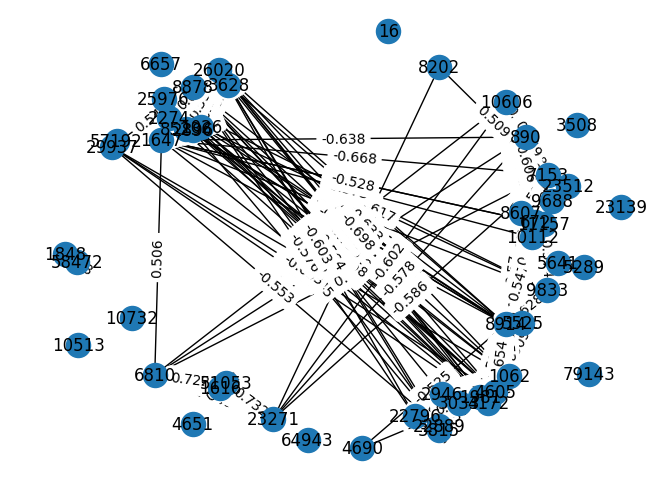

: 

In [ ]:
# create a graph with networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# add nodes
G.add_node(gene_id)
for i in top50_gene_ids:
    G.add_node(i)

# only add edges if the absolut correlation is above a certain threshold
threshold = 0.5
for i in top50_gene_ids:
    for j in top50_gene_ids:
        # get correlation value rounded to 3 decimal places
        temp_corr = round(corr_matrix_top50.loc[i, j], 3)
        temp_abs_corr = abs(temp_corr)
        if i != j and temp_abs_corr > threshold:
            G.add_edge(i, j, weight=temp_corr)

# draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, edge_color='black')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.circular_layout(G)
plt.show()

